# Visualize Decision Trees
## Author: Vervit Khandelwal 

In [30]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Read Dataset Iris 

In [3]:
df= pd.read_csv('Iris.csv')

In [4]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

## Preprocessing of Traget Variable

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [26]:
df.set_index('Id').head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0


# Split dataset into Training and testing data 

In [17]:
from sklearn.model_selection import train_test_split
y=df['Species'].values.reshape(-1,1)
x=df.drop(['Species'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Import DecisionTreeClassifier form Sklearn

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [19]:
model = DecisionTreeClassifier(random_state=1234,max_depth=9)

In [20]:
model.fit(X_train,y_train.ravel())

DecisionTreeClassifier(max_depth=9, random_state=1234)

In [21]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Visualize Decision Tree

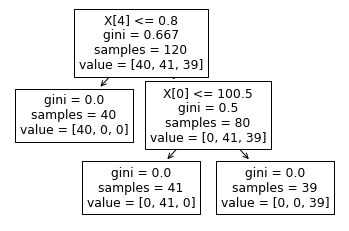

In [27]:
tree.plot_tree(model);

In [28]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 0.80
|   |--- class: 0
|--- feature_4 >  0.80
|   |--- feature_0 <= 100.50
|   |   |--- class: 1
|   |--- feature_0 >  100.50
|   |   |--- class: 2



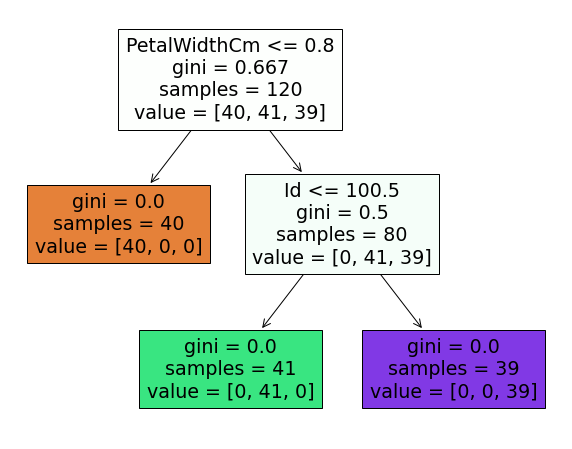

In [29]:
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(model, 
                   feature_names=x.columns,
                   filled=True)